## Master thesis: Car Sales Forecasting in Finland using Machine Learning

### Install Required Libraries:

* Lib 1 
* Lib 2

In [ ]:
pip install xgboost

In [28]:
##########################
# Import libraries
##########################

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import glob
import time

import matplotlib.dates as mdates

from xgboost import XGBRegressor
import xgboost as xgb

plt.rcParams["figure.figsize"] = [16, 9]

##########################
# Define global variables
##########################

# Input filename, path to source files and output filename
input_files = "Retails_CY*.xls*"
sales_channel_file = "SalesChannels.xlsx"
path = 'D:/Git_Projects/5. Master_thesis/Data/'
filename = path + 'Retails_ALL_CY11_CY22.xlsx'
external_filename = path + 'External/External_indicators.xlsx'

### Loading data:

#### 1. Merging files into one single Excel file

In [2]:
# List excel files in the path
file_list = glob.glob(path + input_files)

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the 
# excel data into pandas dataframe.
excl_list = []

print("Reading files....\n") 
start_time = time.time()

for file in file_list:
    print(file)
    excl_list.append(pd.read_excel(file))
 
# concatenate all DataFrames in the list
# into a single DataFrame, returns new
# DataFrame.
excl_merged = pd.concat(excl_list, ignore_index=True)
 
# exports the dataframe into excel file
# with specified name.
print('\nMerging %d files....\n' % len(file_list)) 
excl_merged.to_excel(filename, index=False)

end_time = time.time()
time_elapsed = end_time - start_time 
print('Completed in %f seconds.' % time_elapsed)

Reading files....

D:/Git_Projects/5. Master_thesis/Data\Retails_CY11.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY12.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY13.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY14.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY15.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY16.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY17.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY18.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY19.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY20.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY21.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY22.xlsx

Merging 12 files....

Completed in 278.147778 seconds.


#### 2. Reading Excel File and loading content into Pandas dataframe

In [3]:
# Load files into a pandas dataframe
df = pd.concat(pd.read_excel(filename, sheet_name=None), ignore_index=True)
sales_channel_df = pd.concat(pd.read_excel(path + sales_channel_file, sheet_name=None), ignore_index=True)

In [4]:
# Preview the sales dataframe
df

,vehOrderClassCode,RetailNSC,NSCModelGroupCode,ReportingModelGroup,orderNumber,FleetCode,DealerCodeRetail,orderCreatedDate,RetailCountry,RetailDate,ModelGroup,EndItem,EIColourCode,DealerDeliveryAddrNoRetail,FinancialOwnerCategoryCurrent,FinancialOwnerCategoryNext,RetailCount,Month
0,U,37,F15,F15F,NNE0150004,NaN,130520,2010-06-17 09:38:00,DEN,02/01/2011 09:13:58,F15F,F15FFDTALRFF15EGAF49ADNNE NAHR,NAHR,1,4,5,1,Jan
1,B,37,D40,D40D,NNE0144170,011070,150110,2010-05-19 08:01:00,SWE,02/01/2011 15:12:15,D40D,D40DCTUZLVLD40UG5--DNKNNE KL0K,KL0K,1,4,5,1,Jan
2,L,37,F15,F15F,NNE0161192,000194,160040,2010-10-15 14:44:00,FIN,03/01/2011 06:25:49,F15F,F15FFDTALUFF15EGADB9DJNNE KY0G,KY0G,1,4,5,1,Jan
3,L,37,J10F,J10G,NNE0146363,000964,160040,2010-06-03 05:55:00,FIN,03/01/2011 06:28:35,J10G,J10GJDTALBFJ10EGABC---NNE C30G,C30G,1,4,5,1,Jan
4,P,37,J10,J10B,NNE0147851,NaN,160230,2010-06-08 13:04:00,FIN,03/01/2011 06:30:20,J10B,J10BFDTALBFJ10EGABC-D-NNE KAQG,KAQG,1,4,5,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465355,D,37,ZE1,ZE1A,NNE0646910,,151090,2022-03-02 07:49:21,SWE,01/08/2022 06:35:16,ZE1A,ZE1AFSDALG9ZE16GD-L-G-NNE RCJG,RCJG,1,4,5,1,August
465356,P,37,ZE1,ZE1A,NNE0646922,,140240,2022-03-02 09:24:37,NOR,29/08/2022 08:58:14,ZE1A,ZE1AFSDALG9ZE18GD---G-NNE KADG,KADG,1,4,5,1,August
465357,P,37,ZE1,ZE1A,NNE0646927,,140380,2022-03-02 09:47:36,NOR,15/08/2022 14:35:03,ZE1A,ZE1AFSDALB9ZE16GDA--G-NNE KADG,KADG,1,4,5,1,August
465358,L,37,ZE1,ZE1A,NNE0647072,021717,151010,2022-03-04 10:09:25,SWE,10/08/2022 08:28:45,ZE1A,ZE1AFSDALE9ZE16GDBP-G-NNE 326G,326G,1,4,5,1,August


In [5]:
# Preview the Sales Channel dataframe
sales_channel_df

,vehOrderClassCode,VehicleSalesChannelDesc
0,B,B2B
1,C,DEALER FLEET / GOVERNMENT
2,D,CAPTIVE
3,E,PRIVATE
4,F,RENTAL
5,G,DIRECT FLEET / GOVERNMENT
6,H,PRIVATE
7,L,DEALER FLEET / GOVERNMENT
8,LB,DEALER FLEET / GOVERNMENT
9,N,RENTAL


In [6]:
# Remove spaces in the common column between both dataframes (vehOrderClassCode)
sales_channel_df['vehOrderClassCode'] = sales_channel_df['vehOrderClassCode'].str.replace(" ", "")
df['vehOrderClassCode'] = df['vehOrderClassCode'].str.replace(" ", "")

# Merge both dataframes
data = df.merge(sales_channel_df, on = "vehOrderClassCode")

In [7]:
# Preview merged dataframe
data

,vehOrderClassCode,RetailNSC,NSCModelGroupCode,ReportingModelGroup,orderNumber,FleetCode,DealerCodeRetail,orderCreatedDate,RetailCountry,RetailDate,ModelGroup,EndItem,EIColourCode,DealerDeliveryAddrNoRetail,FinancialOwnerCategoryCurrent,FinancialOwnerCategoryNext,RetailCount,Month,VehicleSalesChannelDesc
0,U,37,F15,F15F,NNE0150004,NaN,130520,2010-06-17 09:38:00,DEN,02/01/2011 09:13:58,F15F,F15FFDTALRFF15EGAF49ADNNE NAHR,NAHR,1,4,5,1,Jan,UNSOLD
1,U,37,E11,E11B,NNE0159174,NaN,130100,2010-09-27 09:24:00,DEN,02/02/2011 07:53:43,E11B,E11BFDLALBFE11EG5C---FNNE KY0G,KY0G,2,5,4,-1,Feb,UNSOLD
2,U,37,F15,F15F,NNE0169198,NaN,150910,2011-01-12 09:06:00,SWE,21/02/2011 15:51:12,F15F,F15FFDTALRFF15EGAB49ADNNE NAHR,NAHR,1,4,5,1,Feb,UNSOLD
3,U,37,F15,F15F,NNE0169198,NaN,150910,2011-01-12 09:06:00,SWE,24/02/2011 15:57:56,F15F,F15FFDTALRFF15EGAB49ADNNE NAHR,NAHR,1,5,4,-1,Feb,UNSOLD
4,U,37,J10F,J10G,NNE0162375,NaN,159999,2010-10-26 09:03:00,SWE,08/04/2011 11:12:49,J10G,J10GJDRNLBYJ10EGA-A-C-NNE KY0G,KY0G,1,5,4,-1,Apr,UNSOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465355,LB,37,ZE1,ZE1A,NNE0524398,NaN,151024,43355.502002,SWE,30/04/2019 07:49:29,ZE1A,ZE1AFSDALE9ZE16GAC--X-NNE QABG,QABG,1,4,5,1,Apr,DEALER FLEET / GOVERNMENT
465356,LB,37,ZE1,ZE1A,NNE0523178,NaN,151024,43348.427361,SWE,30/04/2019 08:15:44,ZE1A,ZE1AFSDALE9ZE16GAC--X-NNE QABG,QABG,1,4,5,1,Apr,DEALER FLEET / GOVERNMENT
465357,LB,37,ZE1,ZE1A,NNE0555437,NaN,150970,2019-06-04 15:57:46,SWE,31/07/2019 15:01:29,ZE1A,ZE1AFSDALE9ZE16GBBE-G-NNE 326G,326G,1,4,5,1,Jul,DEALER FLEET / GOVERNMENT
465358,LB,37,J11B,J11B,NNE0606639,NaN,130120,2020-10-29 12:08:05,DEN,23/02/2021 12:51:35,J11B,J11BFDZALG7J11UGDQ7--NNNE KADG,KADG,1,4,5,1,Feb,DEALER FLEET / GOVERNMENT


In [8]:
# Preview dataframe columns
data.columns

Index(['vehOrderClassCode', 'RetailNSC', 'NSCModelGroupCode',
       'ReportingModelGroup', 'orderNumber', 'FleetCode', 'DealerCodeRetail',
       'orderCreatedDate', 'RetailCountry', 'RetailDate', 'ModelGroup',
       'EndItem', 'EIColourCode', 'DealerDeliveryAddrNoRetail',
       'FinancialOwnerCategoryCurrent', 'FinancialOwnerCategoryNext',
       'RetailCount', 'Month', 'VehicleSalesChannelDesc'],
      dtype='object')

In [9]:
# Create a copy
df_Finland = data

In [10]:
pd.set_option('mode.chained_assignment', None)

# Get only Finland orders
df_Finland = df_Finland[df_Finland.RetailCountry == 'FIN']

# Remove duplicates
df_Finland.drop_duplicates(subset=['orderNumber'], keep='last', inplace=True)

# Remove unnecessary columns
df_Finland.drop(['vehOrderClassCode', 'RetailNSC', 'NSCModelGroupCode',
       'ReportingModelGroup', 'FleetCode', 'DealerCodeRetail',
       'orderCreatedDate', 'RetailCountry', 'ModelGroup',
       'EndItem', 'EIColourCode', 'DealerDeliveryAddrNoRetail',
       'FinancialOwnerCategoryCurrent', 'FinancialOwnerCategoryNext',
       'RetailCount', 'Month'], axis=1, inplace=True)

# Convert datetime column to just date
df_Finland['RetailDate'] = pd.to_datetime(df_Finland['RetailDate'], dayfirst=True).dt.date
df_Finland['year'] = pd.DatetimeIndex(df_Finland['RetailDate']).year
df_Finland['month'] = pd.DatetimeIndex(df_Finland['RetailDate']).month

# Get orders with retailed before 01/01/2022
#df_Finland = df_Finland[df_Finland.year < 2022]

In [11]:
# Preview dataframe
df_Finland

,orderNumber,RetailDate,VehicleSalesChannelDesc,year,month
1482,NNE0147856,2011-01-03,B2B,2011,1
1484,NNE0136566,2011-01-03,B2B,2011,1
1489,NNE0165059,2011-01-04,B2B,2011,1
1493,NNE0151580,2011-01-04,B2B,2011,1
1501,NNE0155340,2011-01-05,B2B,2011,1
...,...,...,...,...,...
462544,NNE0593470,2021-01-23,PRIVATE,2021,1
463219,NNE0420173,2017-02-17,DEALER FLEET / GOVERNMENT,2017,2
463254,NNE0420332,2017-02-28,DEALER FLEET / GOVERNMENT,2017,2
463409,NNE0362083,2017-03-29,DEALER FLEET / GOVERNMENT,2017,3


In [12]:
# Verify the number of different sales channels in the dataframe
df_Finland['VehicleSalesChannelDesc'].unique()

array(['B2B                           ', 'DEALER FLEET / GOVERNMENT     ',
       'PRIVATE                       ', 'CAPTIVE                       ',
       'RENTAL                        '], dtype=object)

In [13]:
# Generating index by date, grouping by and counting
result = df_Finland.groupby(['year', 'month', 'VehicleSalesChannelDesc']).size().reset_index(name='Orders')
result['Date'] = pd.to_datetime(result[['year', 'month']].assign(DAY=1))
result.drop(['year', 'month'], axis=1, inplace=True)
result = result.set_index("Date")

In [14]:
# Preview result
result

,VehicleSalesChannelDesc,Orders
Date,,
2011-01-01,B2B,37
2011-01-01,CAPTIVE,132
2011-01-01,DEALER FLEET / GOVERNMENT,98
2011-01-01,PRIVATE,632
2011-01-01,RENTAL,1
...,...,...
2022-07-01,RENTAL,3
2022-08-01,B2B,1
2022-08-01,CAPTIVE,9


#### 3. Saving dataframe into an Excel file

In [63]:
result.to_excel("output.xlsx")  

#### 4. Reading data 
- Execution can start from here

In [2]:
# Load file into a pandas dataframe
file = 'D:/Git_Projects/5. Master_thesis/output.xlsx'
result = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)
result = result.set_index("Date")

In [3]:
# Preview dataframe
result

,VehicleSalesChannelDesc,Orders
Date,,
2011-01-01,B2B,37
2011-01-01,CAPTIVE,132
2011-01-01,DEALER FLEET / GOVERNMENT,98
2011-01-01,PRIVATE,632
2011-01-01,RENTAL,1
...,...,...
2022-07-01,RENTAL,3
2022-08-01,B2B,1
2022-08-01,CAPTIVE,9


#### 5. Plotting data

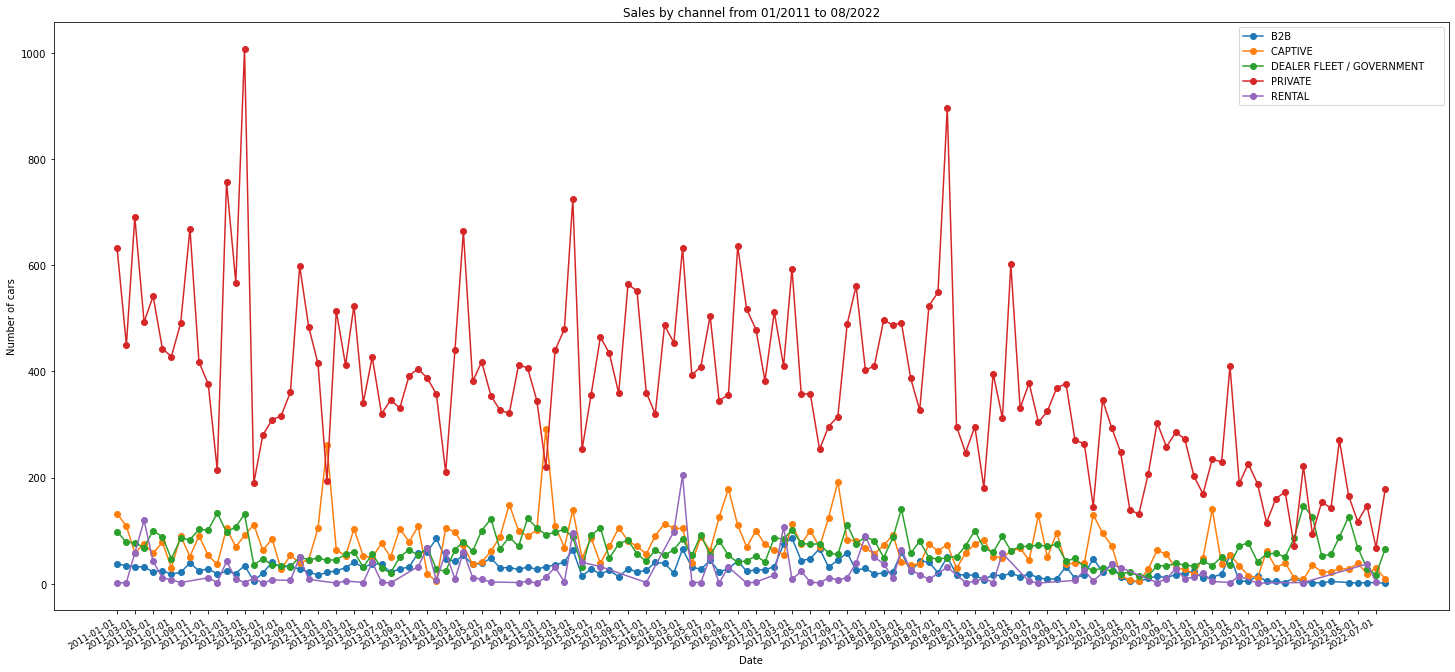

In [4]:
fig, axes = plt.subplots(figsize=(25,12))
xticks = pd.date_range(start=result.index.min(), end=result.index.max(), freq='2MS')
result.groupby('VehicleSalesChannelDesc')['Orders'].plot(legend=True, marker = 'o', xticks=xticks)

# Add title and axis names
plt.title('Sales by channel from 01/2011 to 08/2022')
plt.ylabel('Number of cars')
plt.xticks(fontsize=9)

# Show graph
plt.show()

In [5]:
pivot = result.pivot(columns='VehicleSalesChannelDesc', values='Orders')
clean_pivot = pivot.rename_axis(None, axis=1).reset_index()

In [6]:
clean_pivot = clean_pivot.set_index('Date')

In [7]:
# Changing columns name with index number
clean_pivot.columns.values[0] = "B2B"
clean_pivot.columns.values[1] = "CAPTIVE"
clean_pivot.columns.values[2] = "FLEET"
clean_pivot.columns.values[3] = "PRIVATE"
clean_pivot.columns.values[4] = "RENTAL"

In [8]:
clean_pivot

,B2B,CAPTIVE,FLEET,PRIVATE,RENTAL
Date,,,,,
2011-01-01,37.0,132.0,98.0,632.0,1.0
2011-02-01,34.0,108.0,78.0,450.0,2.0
2011-03-01,32.0,58.0,77.0,691.0,58.0
2011-04-01,31.0,75.0,68.0,493.0,119.0
2011-05-01,22.0,57.0,100.0,542.0,42.0
...,...,...,...,...,...
2022-04-01,2.0,27.0,126.0,165.0,NaN
2022-05-01,1.0,38.0,68.0,117.0,NaN
2022-06-01,2.0,19.0,28.0,147.0,37.0


In [9]:
# Convert columns from float to int and replace NaN values
clean_pivot['B2B'] = clean_pivot['B2B'].fillna(0).astype(int)
clean_pivot['CAPTIVE'] = clean_pivot['CAPTIVE'].fillna(0).astype(int)
clean_pivot['FLEET'] = clean_pivot['FLEET'].fillna(0).astype(int)
clean_pivot['PRIVATE'] = clean_pivot['PRIVATE'].fillna(0).astype(int)
clean_pivot['RENTAL'] = clean_pivot['RENTAL'].fillna(0).astype(int)

In [10]:
clean_pivot

,B2B,CAPTIVE,FLEET,PRIVATE,RENTAL
Date,,,,,
2011-01-01,37,132,98,632,1
2011-02-01,34,108,78,450,2
2011-03-01,32,58,77,691,58
2011-04-01,31,75,68,493,119
2011-05-01,22,57,100,542,42
...,...,...,...,...,...
2022-04-01,2,27,126,165,0
2022-05-01,1,38,68,117,0
2022-06-01,2,19,28,147,37


In [11]:
clean_pivot.reset_index(drop=True)

,B2B,CAPTIVE,FLEET,PRIVATE,RENTAL
0,37,132,98,632,1
1,34,108,78,450,2
2,32,58,77,691,58
3,31,75,68,493,119
4,22,57,100,542,42
...,...,...,...,...,...
135,2,27,126,165,0
136,1,38,68,117,0
137,2,19,28,147,37
138,0,29,17,68,3


In [12]:
# summarize shape
print(clean_pivot.shape)

(140, 5)


In [13]:
# Load external indicators into a pandas dataframe
df_external = pd.concat(pd.read_excel(external_filename, sheet_name=None), ignore_index=True)

In [14]:
df_external.set_index('Date', inplace=True)

In [15]:
df_external

,CCI,CPI,CoL,Light_fuel_oil,Diesel,Petrol_95,Petrol_98,Passenger_cars,Vans
Date,,,,,,,,,
2011-01-01,0.3,101.78,1783,1.05,1.31,1.51,1.56,13788,1205
2011-02-01,0.4,102.40,1794,1.02,1.32,1.50,1.56,9304,966
2011-03-01,-0.2,102.96,1804,1.09,1.38,1.56,1.61,12585,1342
2011-04-01,-0.6,103.16,1807,1.10,1.38,1.57,1.63,11406,1085
2011-05-01,-1.5,103.21,1808,1.04,1.38,1.59,1.65,13040,1179
...,...,...,...,...,...,...,...,...,...
2022-04-01,-11.7,121.09,2121,1.59,2.22,2.17,2.26,6432,788
2022-05-01,-11.6,122.67,2149,1.74,2.27,2.30,2.39,7942,856
2022-06-01,-14.3,123.56,2165,1.95,2.44,2.57,2.67,7398,907


In [16]:
# Merge both dataframes
final = pd.concat([clean_pivot,df_external], axis=1)

In [17]:
final

,B2B,CAPTIVE,FLEET,PRIVATE,RENTAL,CCI,CPI,CoL,Light_fuel_oil,Diesel,Petrol_95,Petrol_98,Passenger_cars,Vans
Date,,,,,,,,,,,,,,
2011-01-01,37,132,98,632,1,0.3,101.78,1783,1.05,1.31,1.51,1.56,13788,1205
2011-02-01,34,108,78,450,2,0.4,102.40,1794,1.02,1.32,1.50,1.56,9304,966
2011-03-01,32,58,77,691,58,-0.2,102.96,1804,1.09,1.38,1.56,1.61,12585,1342
2011-04-01,31,75,68,493,119,-0.6,103.16,1807,1.10,1.38,1.57,1.63,11406,1085
2011-05-01,22,57,100,542,42,-1.5,103.21,1808,1.04,1.38,1.59,1.65,13040,1179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,2,27,126,165,0,-11.7,121.09,2121,1.59,2.22,2.17,2.26,6432,788
2022-05-01,1,38,68,117,0,-11.6,122.67,2149,1.74,2.27,2.30,2.39,7942,856
2022-06-01,2,19,28,147,37,-14.3,123.56,2165,1.95,2.44,2.57,2.67,7398,907


In [18]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.7.2


## Select input and target variables

In [19]:
X = final.drop(['PRIVATE'], axis=1)
y = final["PRIVATE"]

## Split dataset into train and test sets

In [20]:
from sklearn.model_selection import train_test_split
#clean_pivot.drop(['row_id', 'time_id'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [21]:
X_train.shape, X_test.shape

((112, 13), (28, 13))

In [29]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [25]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 72.653859


In [32]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=42)

In [33]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,368.897880,12.618361,368.081924,28.865079
1,337.347801,11.430440,337.864388,30.209572
2,308.618192,10.960824,309.358712,31.367627
3,282.799589,10.193485,283.653487,32.242495
4,259.745429,9.594686,261.709599,32.982860


In [34]:
print((cv_results["test-rmse-mean"]).tail(1))

32    115.488021
Name: test-rmse-mean, dtype: float64


In [35]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

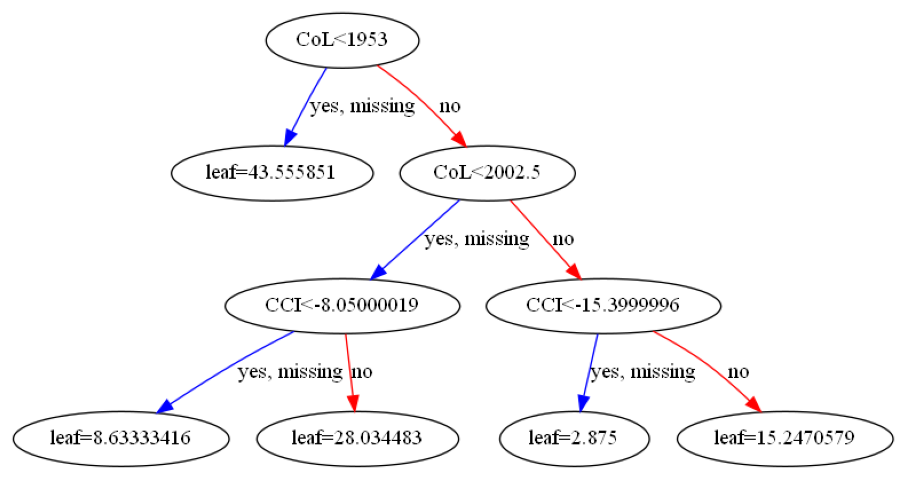

In [36]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

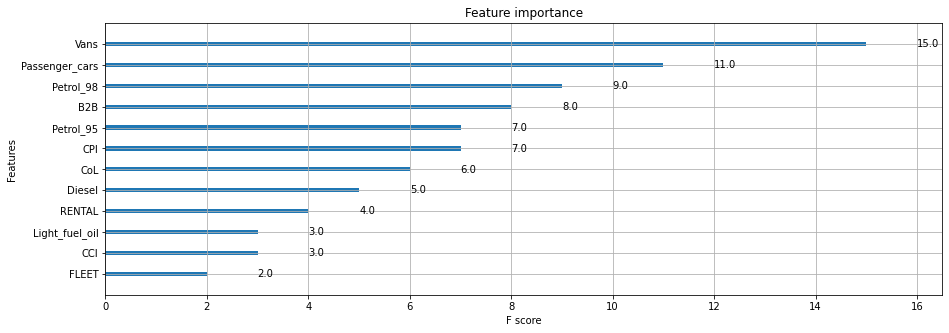

In [39]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

## Choosing classifier

In [45]:
from xgboost import XGBRegressor
import xgboost as xgb
#create an xgboost regression model
model = XGBRegressor()

## Fitting the model

In [46]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

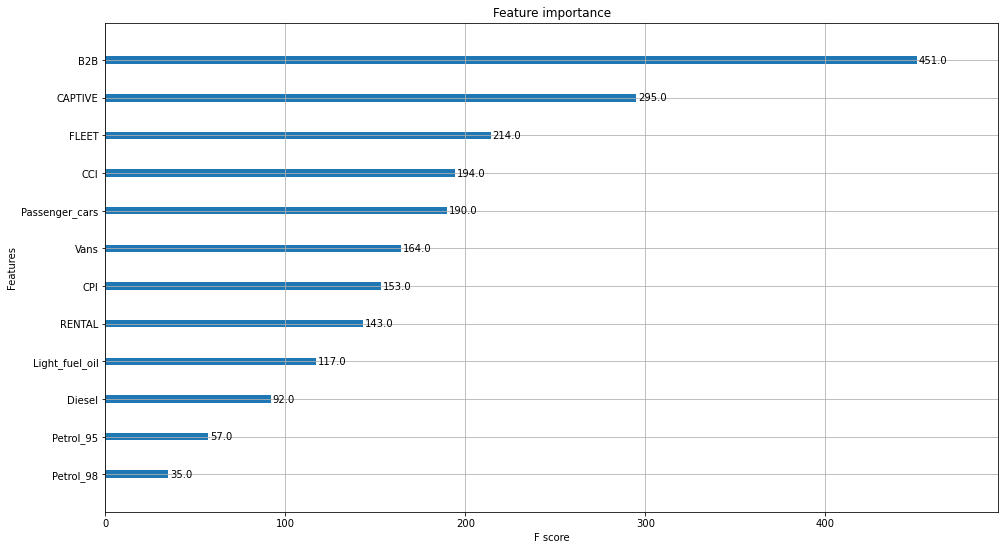

In [47]:
xgb.plot_importance(model, ax=plt.gca())

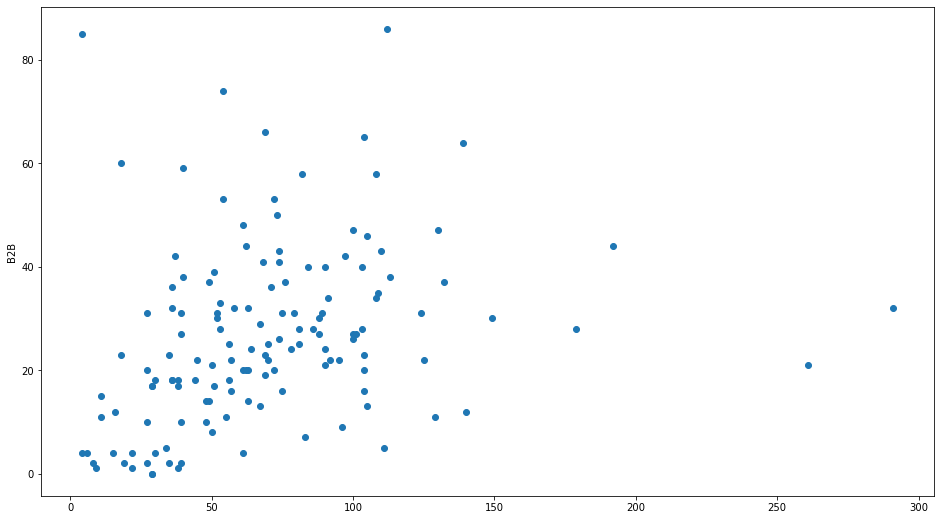

In [48]:
plt.scatter(clean_pivot["CAPTIVE"], clean_pivot["B2B"])
plt.ylabel("B2B")
plt.show()

## Tuning hyperparameters

In [ ]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [26]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# split data into input and output columns
X, y = datavalues[:, :-1], datavalues[:, -1]
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 20.692 (7.774)


In [51]:
# Scale the independent variables
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [52]:
import xgboost
reg = xgboost.XGBRegressor(objective='reg:squarederror', \
                           n_estimators=1000, \
                          nthread=24)
reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=24,
             nthread=24, num_parallel_tree=1, predictor='auto', ...)

In [53]:
predictions_xgb = reg.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_xgb = sqrt(mean_squared_error(y_test, predictions_xgb))
print("XGBoost - Root Mean Square Error (RMSE): %.3f" % rmse_xgb)

XGBoost - Root Mean Square Error (RMSE): 68.086
